In [0]:
import numpy as np
import random as rd
import matplotlib.mlab as mlab
import matplotlib.pyplot as plt
import random, math
from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split

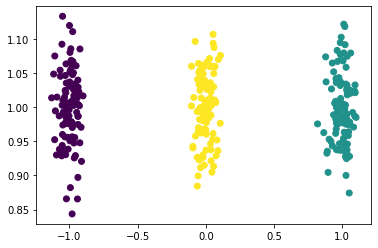

In [313]:
sigma = 0.05
X,Y = make_blobs(n_samples=300, centers=[[-1,1],[1,1],[0,1]], cluster_std=sigma)
plt.scatter(X[:,0], X[:,1],c=Y)

In [0]:
#if norme = 1, use L1 norm, else if norme = 2 use L2 norm 
def distance(x1,x2,norme):
  if(norme == 2):
    a = x1[0] - x2[0] 
    b = x1[1] - x2[1]
    return a**2 + b**2
  elif(norme == 1):
    a = np.abs(x1[0] - x2[0])
    b = np.abs(x1[1] - x2[1])
    return np.sqrt(a**2 + b**2)
  

In [0]:
#if norme = 1, use L1 norm, else if norme = 2 use L2 norm 
def find_closest_centroid(x, centroids,norme):
  mini = 65535
  closest = 0
  for i in range(len(centroids)):
    dist = distance(x,centroids[i],norme)
    if dist < mini:
      mini = dist
      closest = i
  return closest

In [316]:
def pick_centroids(X,Y,nbr_centroids,random):
    centroids = np.zeros((nbr_centroids,len(X[1])))
    for k in range(nbr_centroids):

      #if random = False, one centroid per cluster, else ramdom
        if(random == False):
          index = np.random.choice([i for i in range(len(Y)) if Y[i] == k])
        else:
          index = np.random.randint(0,len(X))


        centroids[k] = X[index]
    return centroids

centroids = pick_centroids(X,Y,3,False)
print(centroids)

[[-1.05235118  0.94387026]
 [ 0.98810156  1.00708029]
 [-0.01732178  0.99286145]]


In [0]:
#if norme = 1, use L1 norm, else if norme = 2 use L2 norm 
def cost(X,clusters,centroids,norme):
  cost = 0
  for i in range(len(X)):
    cost += distance(X[i],centroids[clusters[i]],norme)
  return cost


#############################################################################
The algorithm converged after 2 iterations!
#############################################################################


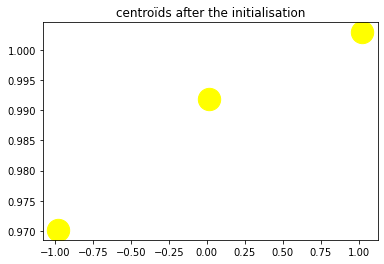

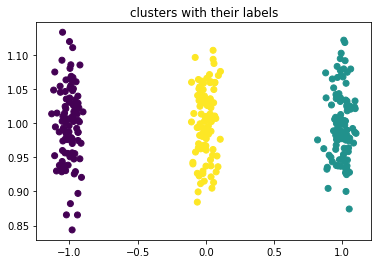

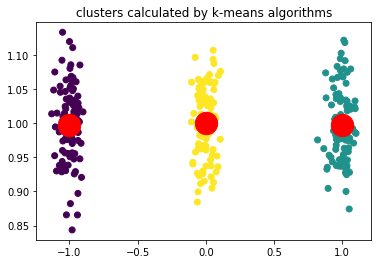

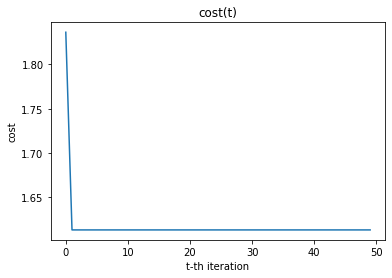

In [325]:
#if norme = 1, use L1 norm, else if norme = 2 use L2 norm 
#if random_pick = False, choose one centroid in each cluster, and randomly if True
def kMeans(X,Y, nbr_centroids, nbr_iterations,random_pick,norme):
  '''Run the k-means algorithm
  '''
  centroids = pick_centroids(X,Y,nbr_centroids,random_pick)
  plt.scatter(centroids[:,0], centroids[:,1],c='yellow',s=500)
  plt.title('centroïds after the initialisation')
  clusters = np.zeros(len(X), dtype=int)
  costs = np.zeros(nbr_iterations)
  convergence = -1

  #Run nbr_iterations iterations
  for t in range(nbr_iterations):
    #Classify each sample
    for i in range(len(X)):
      clusters[i] = find_closest_centroid(X[i], centroids,norme)

    costs[t] = cost(X,clusters,centroids,norme)

    if(costs[t] == costs[t-1] and convergence == -1):
      convergence = t
    
    #Update class centers
    sums = np.zeros((nbr_centroids,len(X[1])))
    nbr = np.zeros(nbr_centroids, dtype=int)
    for i in range(len(X)):
      nbr[clusters[i]] += 1
      sums[clusters[i]] += X[i]

    for i in range(len(centroids)):
      centroids[i] = sums[i] / nbr[i]
    
  return clusters,centroids,costs,convergence

clusters,centroids,costs,converge = kMeans(X,Y, 3, 50,False,2)
plt.figure()
plt.scatter(X[:,0],X[:,1],c=Y)
plt.title('clusters with their labels')
plt.figure()
plt.scatter(X[:,0],X[:,1],c=clusters)
plt.scatter(centroids[:,0], centroids[:,1],c='red',s=500)
plt.title('clusters calculated by k-means algorithms')
plt.figure()
plt.title('cost(t)')
plt.xlabel('t-th iteration')
plt.ylabel('cost')
plt.plot(np.arange(0,50),costs)
print('\n#############################################################################')
print('The algorithm converged after ' + str(converge) + ' iterations!')
print('#############################################################################')


#############################################################################
The algorithm converged after 11 iterations!
#############################################################################


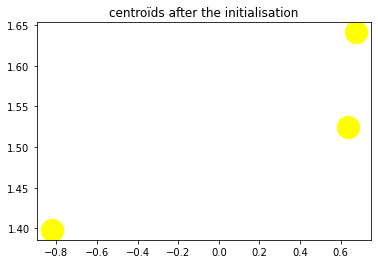

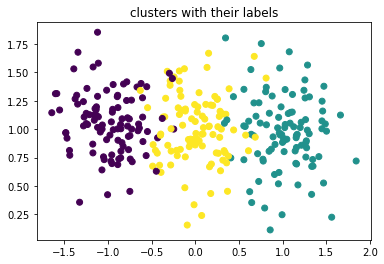

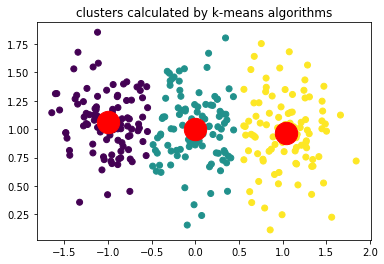

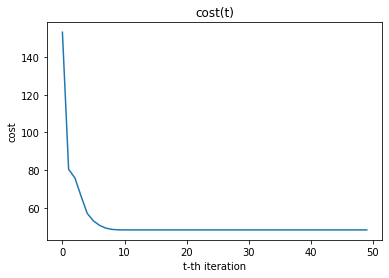

In [327]:
def kMeans_parameter(sigma,nbr_centroids, nbr_iterations,random,norme):
  X,Y = make_blobs(n_samples=300, centers=[[-1,1],[1,1],[0,1]], cluster_std=sigma)
  clusters,centroids,costs,converge = kMeans(X,Y, nbr_centroids, nbr_iterations,random,norme)
  plt.figure()
  plt.scatter(X[:,0],X[:,1],c=Y)
  plt.title('clusters with their labels')
  plt.figure()
  plt.scatter(X[:,0],X[:,1],c=clusters)
  plt.scatter(centroids[:,0], centroids[:,1],c='red',s=500)
  plt.title('clusters calculated by k-means algorithms')
  plt.figure()
  plt.title('cost(t)')
  plt.xlabel('t-th iteration')
  plt.ylabel('cost')
  plt.plot(np.arange(0,50),costs)
  print('\n#############################################################################')
  print('The algorithm converged after ' + str(converge) + ' iterations!')
  print('#############################################################################')

kMeans_parameter(0.3,3, 50,False,2)
